In [1]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])


print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
print("Missing values in each column:\n", df.isnull().sum())


print("\nDataset shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)


print("\nClass distribution of species:\n", df['species'].value_counts())


print("\nStatistical summary:\n", df.describe())

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Dataset shape: (150, 5)

Column data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Class distribution of species:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300

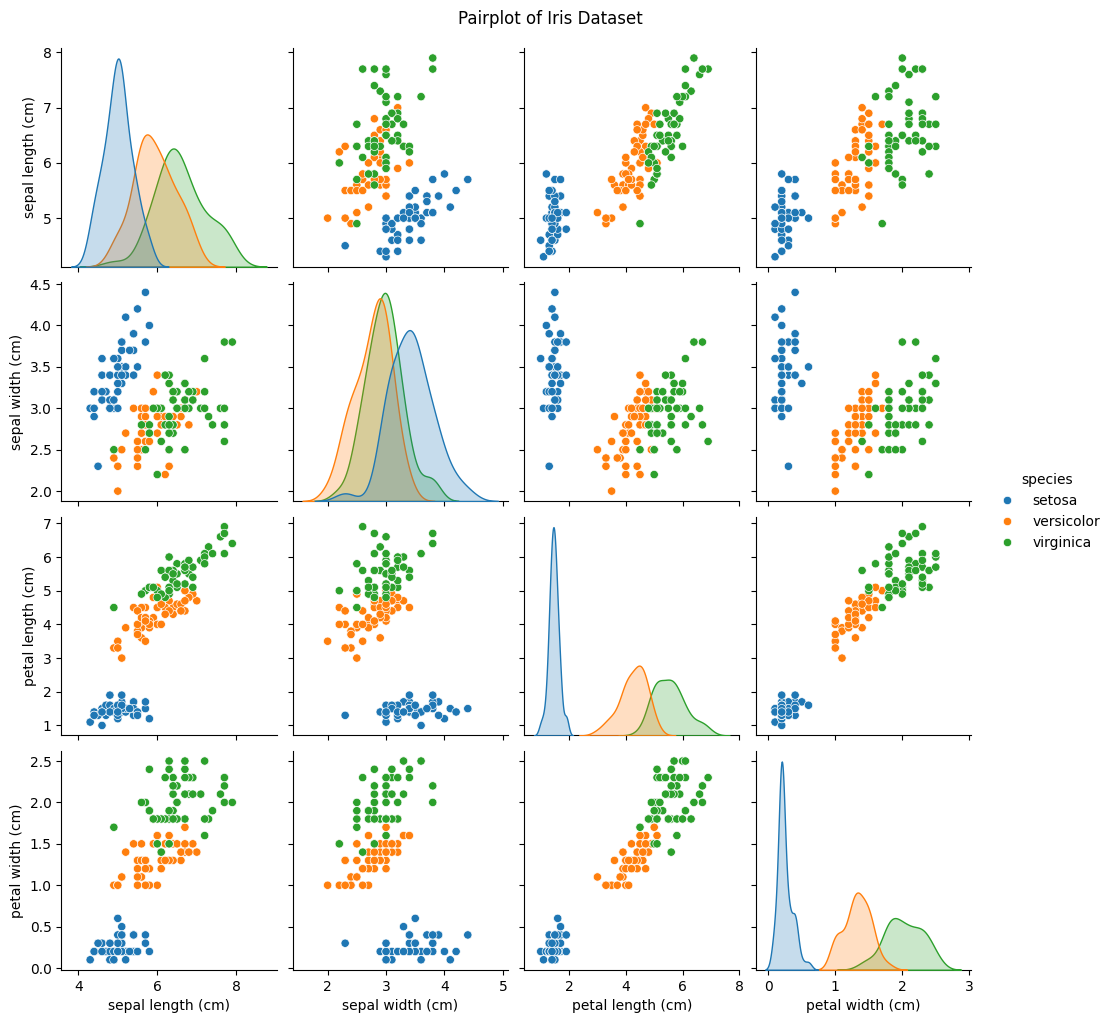

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


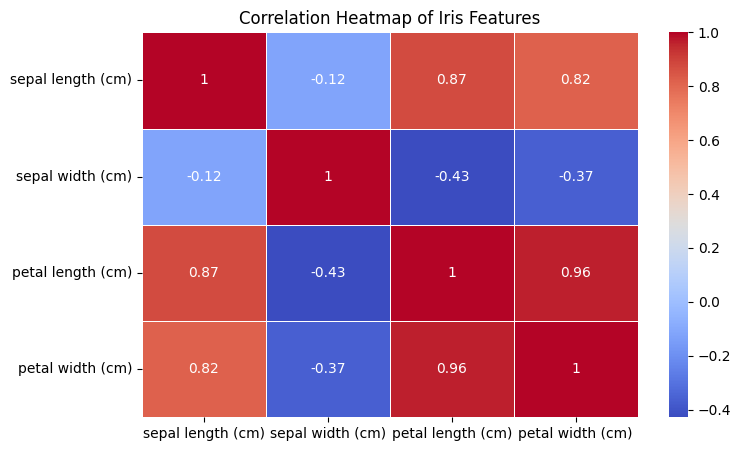

In [8]:

plt.figure(figsize=(8, 5))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Features")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split


X = df.drop('species', axis=1)
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (120, 4)
Testing data shape: (30, 4)


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Predictions on test data:")
print(y_pred)


Predictions on test data:
[np.str_('versicolor') np.str_('setosa') np.str_('virginica')
 np.str_('versicolor') np.str_('versicolor') np.str_('setosa')
 np.str_('versicolor') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('virginica') np.str_('setosa')
 np.str_('setosa') np.str_('setosa') np.str_('setosa')
 np.str_('versicolor') np.str_('virginica') np.str_('versicolor')
 np.str_('versicolor') np.str_('virginica') np.str_('setosa')
 np.str_('virginica') np.str_('setosa') np.str_('virginica')
 np.str_('virginica') np.str_('virginica') np.str_('virginica')
 np.str_('virginica') np.str_('setosa') np.str_('setosa')]


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Model Accuracy: 100.00%


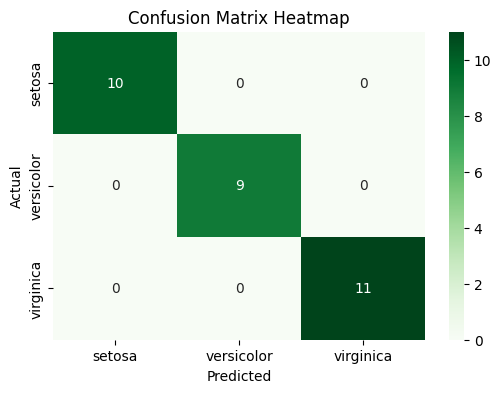

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
